
# Project: Investigate a No-show appointments Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each rowThis dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row
>The data centered around wether the patient will show up p for their scheduled appointments or not




### Using pandas,numpy,matplotlib 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sas
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



#### General Properties


### Data Cleaning 
>Read data from CSV file and save it as data frames

In [2]:
df_row_data=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### investigate data

In [3]:
df_row_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### There are any null values?

In [4]:
df_row_data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### There are any Nan values?

In [5]:
df_row_data.isna().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### More investigate!

In [6]:
df_row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df_row_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df_row_data.shape

(110527, 14)

### Check whether there are any duplicate rows or not


In [9]:
df_row_data.duplicated().sum()

0

### Drop PatientId and  AppointmentID because they are useless in our investigation

In [10]:
df_cleaned=df_row_data.drop(['PatientId','AppointmentID'],axis=1)

### To know more about data types

In [11]:
def get_type(column_name):
    temp=type(df_cleaned[column_name][0])
    print(column_name+' is: '+ str(temp)+'  ex: '+str(df_cleaned[column_name][0]))

In [12]:
for column_name in df_cleaned.columns:
    get_type(column_name)

Gender is: <class 'str'>  ex: F
ScheduledDay is: <class 'str'>  ex: 2016-04-29T18:38:08Z
AppointmentDay is: <class 'str'>  ex: 2016-04-29T00:00:00Z
Age is: <class 'numpy.int64'>  ex: 62
Neighbourhood is: <class 'str'>  ex: JARDIM DA PENHA
Scholarship is: <class 'numpy.int64'>  ex: 0
Hipertension is: <class 'numpy.int64'>  ex: 1
Diabetes is: <class 'numpy.int64'>  ex: 0
Alcoholism is: <class 'numpy.int64'>  ex: 0
Handcap is: <class 'numpy.int64'>  ex: 0
SMS_received is: <class 'numpy.int64'>  ex: 0
No-show is: <class 'str'>  ex: No


### Change column_name to_datetime data type to use it

In [13]:
def chance_to_datetime(column_name):
    df_temp=df_cleaned[column_name]
    df_cleaned[column_name]=pd.to_datetime(df_temp)


In [14]:
chance_to_datetime('AppointmentDay')
chance_to_datetime('ScheduledDay')

### Plot all data to find any outliers

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>],
       [<AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>],
       [<AxesSubplot:title={'center':'SMS_received'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

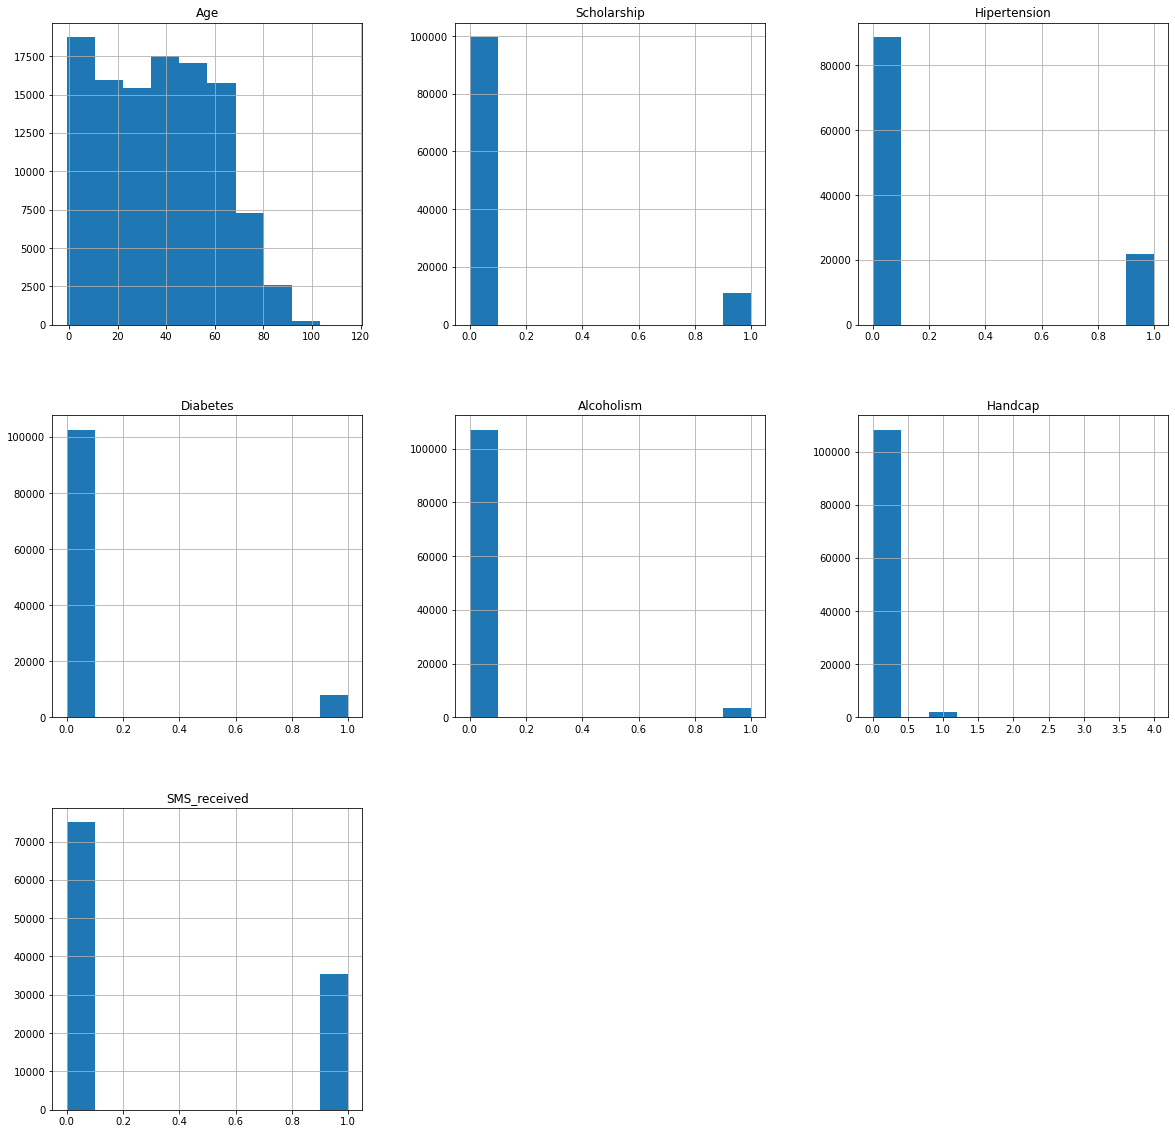

In [15]:
df_cleaned.hist(figsize=(20,20))


## Exploratory Data Analysis



### Is long waiting can be a factor?


In [16]:
df_number_of_days=df_cleaned.AppointmentDay-df_cleaned.ScheduledDay

In [17]:
df_cleaned['time_before_appointmen']=df_number_of_days

In [18]:
df_cleaned['time_before_appointmen']=df_cleaned['time_before_appointmen'].dt.days

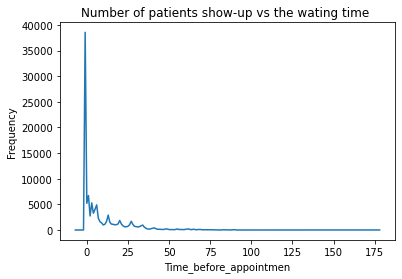

In [19]:
df_cleaned.groupby('time_before_appointmen')['No-show'].count().plot()
plt.xlabel('Time_before_appointmen')
plt.ylabel('Frequency')
plt.title('Number of patients show-up vs the wating time ')
plt.show()

Most of the patients show-up at the same day of the reservation.

### Example of limitations
<a id='ex'></a>

In [20]:
for day in df_cleaned['time_before_appointmen']:
    if day < -1:
        print(day)

-2
-2
-2
-7
-2


#### Is the location(Neighbourhood) are important?


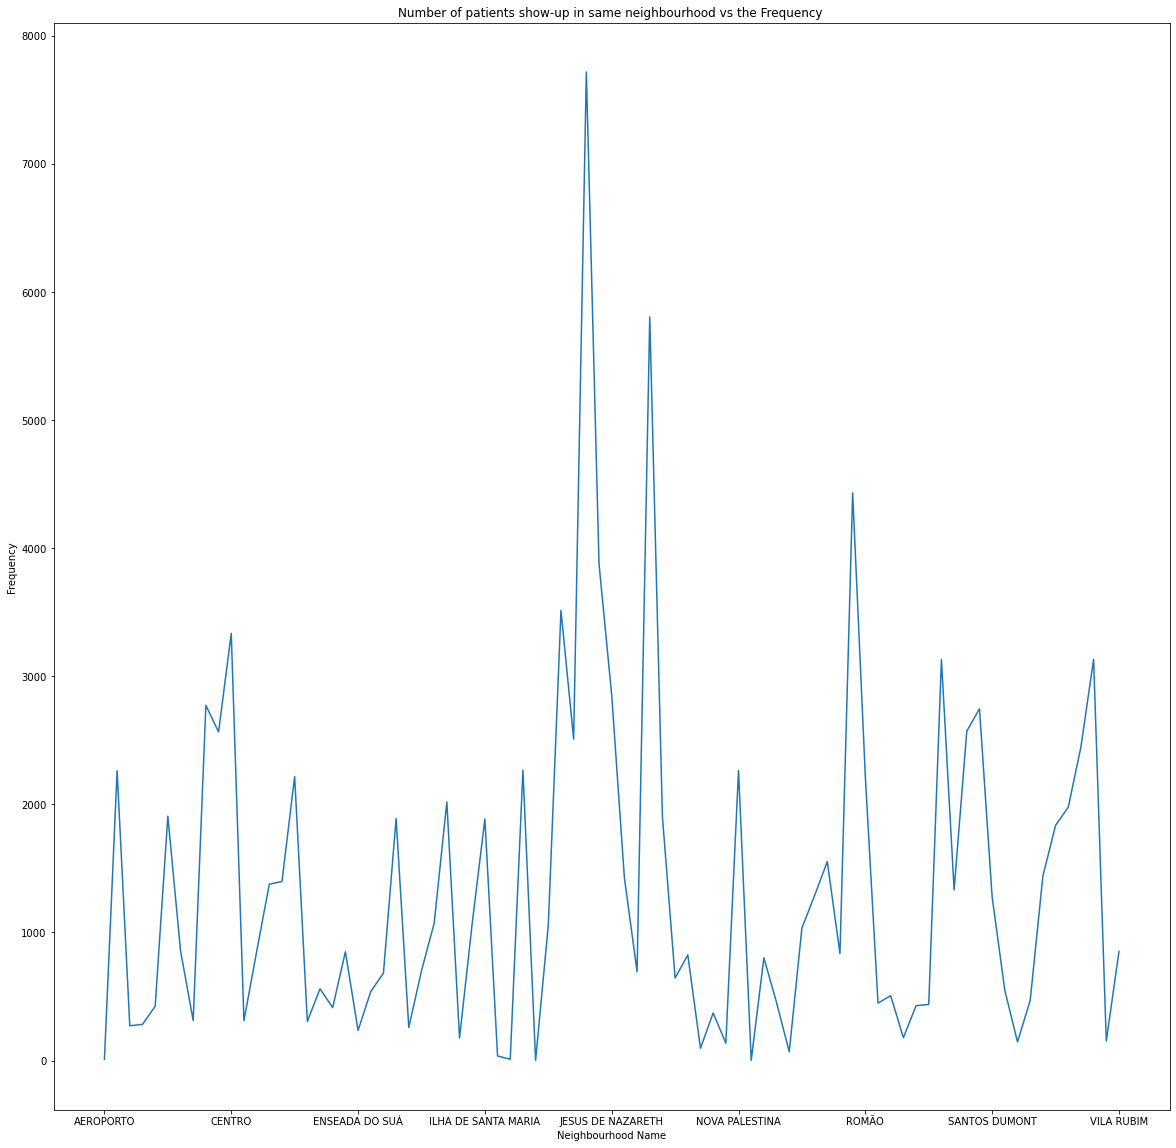

In [21]:
df_cleaned.groupby('Neighbourhood')['No-show'].count().plot(figsize=(20,20))
plt.xlabel('Neighbourhood Name')
plt.ylabel('Frequency')
plt.title('Number of patients show-up in same neighbourhood vs the Frequency ')
plt.show()


Most of the patients show-up from the same Neighbourhood and most patients came from JESUS DE NAZARETH

### The patient will show up if he received the message!


In [22]:
df_cleaned.groupby('SMS_received')['No-show'].count()


SMS_received
0    75045
1    35482
Name: No-show, dtype: int64

### Are a patients with special needs will come?

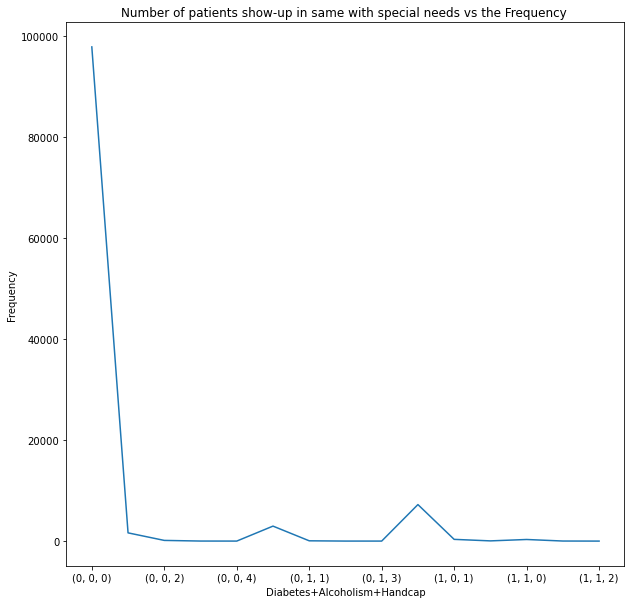

In [23]:
df_cleaned.groupby(['Diabetes','Alcoholism','Handcap'])['No-show'].count().plot(figsize=(10,10))
plt.xlabel('Diabetes+Alcoholism+Handcap')
plt.ylabel('Frequency')
plt.title('Number of patients show-up in same with special needs vs the Frequency ')
plt.show()



when we group the patients with Diabetes, Alcoholism, and Handicap it shows most of the patients will come if they don't have any of these

###  which age is the most shown in the data set?


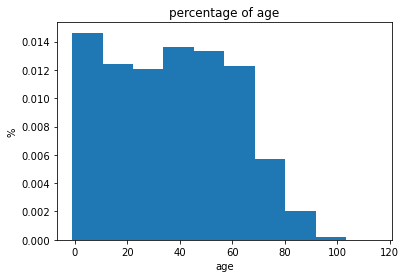

In [26]:
plt.hist( df_cleaned.Age ,density = 0.1)
plt.xlabel('age')
plt.ylabel('%')
plt.title('percentage of age')
plt.show()

Finding the percentage of age category, most of the patients aged between 0 and 10 y

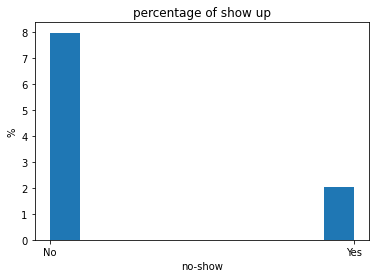

In [27]:
plt.hist( df_cleaned['No-show'] ,density = 0.1)
plt.xlabel('no-show')
plt.ylabel('%')
plt.title('percentage of show up')
plt.show()

Finding the percentage of no-shows where yes or no, 80% of the patients show-up.

<a id='conclusions'></a>
## Conclusions

>> Most probably people with a short waiting (same date) will show up, so yes long waiting is a huge factro.
>>Location(Neighbourhood) is important too, we find a huge number of people came from same Neighbourhood.
>>Received the message is not a factor of show-up unfortunately.
>>patients with special needs('Diabetes','Alcoholism','Handcap') not usuall show-up.
>> Most of the patients aged between 0 and 10 y.
>> 80% of the patients show-up.
### limitations

>> As in <a href="#ex">ex</a> show above there is some show-up happened after the appointment which doesn't make sense and
>> because it a small number of values,I ignore it